# Machine Learning Technologies - Lab 1
## Data Handling and Visualisation Fundamentals

**Objectives:**
1. Learn to load and manipulate data with pandas
2. Visualise data with matplotlib
3. Work with images as numpy arrays
4. Get familiar with basic scikit-learn workflows

**Prerequisites:** Basic Python, numpy knowledge

---


## 1. NumPy refresher

NumPy arrays are the foundation of scientific Python.


In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3, 4, 5])
print(a, a.shape, a.dtype)

[1 2 3 4 5] (5,) int64


In [3]:
b = np.array([[1,2,3,4],[1,2,3,4]])
print(b, b.shape, b.dtype)

[[1 2 3 4]
 [1 2 3 4]] (2, 4) int64


In [4]:
c = np.ones([3,3])
print(c)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [5]:
d = np.arange(1,5)
print(d)

[1 2 3 4]



### Student Task

Create a 3×4 NumPy array containing the values 0–11.


In [6]:
# TODO: create array
task = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
# TODO: print array and shape
print(task, task.shape)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] (3, 4)


## Working with Pandas

Pandas is the standard library for data manipulation in Python. It provides two main data structures:
- **Series**: 1D labelled array
- **DataFrame**: 2D labelled data structure (like a spreadsheet)

Let's start by importing the libraries we'll need:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)



## Pandas introduction

Pandas provides labelled, tabular data structures.

Before continuing, skim:
https://pandas.pydata.org/docs/user_guide/10min.html

One of the restrictions of numpy arrays is that everything must be of the same data type, Pandas does not have this issue


In [8]:

data = {
    "name": ["Alice", "Bob", "Charlie", "Diana"],
    "age": [21, 23, 22, 24],
    "grade": [68, 75, 82, 90]
}

df = pd.DataFrame(data)
df


,name,age,grade
0,Alice,21,68
1,Bob,23,75
2,Charlie,22,82
3,Diana,24,90


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4 non-null      object
 1   age     4 non-null      int64 
 2   grade   4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


We can select an individual column using df["name"], this will return a series

If we want to convert this to a numpy array use .values

In [10]:
print(df["name"])
print("now as array:")
print(df["name"].values)

0      Alice
1        Bob
2    Charlie
3      Diana
Name: name, dtype: object
now as array:
['Alice' 'Bob' 'Charlie' 'Diana']



### Student Task

- Select the `age` column  
- Select `name` and `grade` together  
- Filter rows where `grade >= 75`


In [11]:
## todo
print("Select the age column: ")
print(df["age"])

Select the age column: 
0    21
1    23
2    22
3    24
Name: age, dtype: int64


In [12]:
name_grade_df = df[["name", "grade"]]
print(name_grade_df)

      name  grade
0    Alice     68
1      Bob     75
2  Charlie     82
3    Diana     90


In [13]:
print("Filter rows where grade >= 75: ")
grade_filter = df[df["grade"] >= 75]
print(grade_filter)

Filter rows where grade >= 75: 
      name  age  grade
1      Bob   23     75
2  Charlie   22     82
3    Diana   24     90



## Visualisation


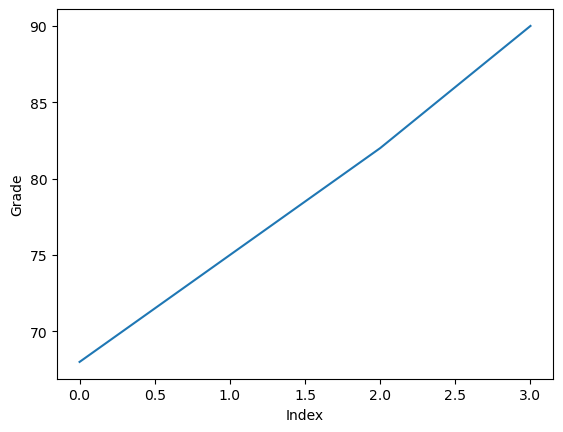

In [14]:

plt.plot(df["grade"])
plt.xlabel("Index")
plt.ylabel("Grade")
plt.show()



### Student Task

Create a bar chart of names vs grades.


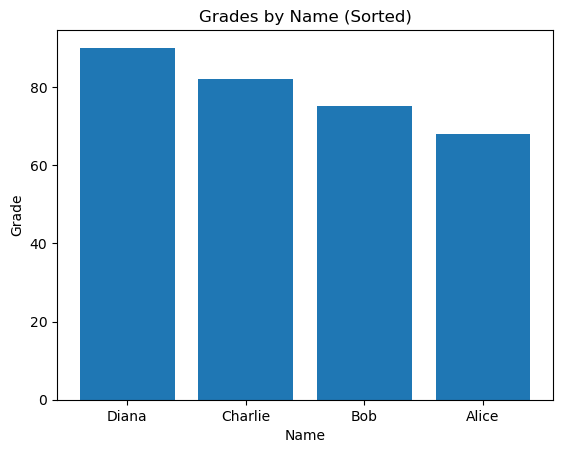

In [15]:

# TODO
df_sorted = df.sort_values(by="grade", ascending=False)

plt.bar(df_sorted["name"], df_sorted["grade"])

plt.xlabel("Name")
plt.ylabel("Grade")
plt.title("Grades by Name (Sorted)")
plt.show()


### 1.1 Creating Sample Data

First, let's create some sample CSV and JSON files to work with:

In [16]:
# Create a sample CSV file - Student Grades
student_data = {
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 
             'Frank', 'Grace', 'Henry', 'Iris', 'Jack'],
    'age': [20, 22, 21, 23, 20, 22, 21, 24, 20, 23],
    'math_score': [85, 72, 90, 88, 76, 95, 82, 79, 91, 84],
    'science_score': [78, 85, 88, 92, 81, 89, 87, 75, 94, 80],
    'attendance': [95, 87, 92, 98, 85, 97, 90, 82, 96, 88]
}

df_students = pd.DataFrame(student_data)
df_students.to_csv('students.csv', index=False)

print("Created students.csv")
print(df_students.head())

Created students.csv
   student_id     name  age  math_score  science_score  attendance
0           1    Alice   20          85             78          95
1           2      Bob   22          72             85          87
2           3  Charlie   21          90             88          92
3           4    Diana   23          88             92          98
4           5      Eve   20          76             81          85


In [17]:
# Create a sample JSON file - Weather Data
weather_data = {
    'city': ['Limerick', 'Galway', 'Dublin', 'Cork', 'Belfast'],
    'temperature': [12.5, 11.8, 13.2, 13.8, 10.9],
    'humidity': [82, 85, 78, 80, 88],
    'wind_speed': [15.2, 18.5, 12.3, 14.1, 20.3],
    'rainfall_mm': [2.3, 3.1, 1.8, 2.0, 3.8]
}

df_weather = pd.DataFrame(weather_data)
df_weather.to_json('weather.json', orient='records', indent=2)

print("Created weather.json")
print(df_weather)

Created weather.json
       city  temperature  humidity  wind_speed  rainfall_mm
0  Limerick         12.5        82        15.2          2.3
1    Galway         11.8        85        18.5          3.1
2    Dublin         13.2        78        12.3          1.8
3      Cork         13.8        80        14.1          2.0
4   Belfast         10.9        88        20.3          3.8


### 1.2 Loading Data

Now let's load these files and explore them:

In [18]:
# Load CSV file
students_df = pd.read_csv('students.csv')

print("First few rows:")
print(students_df.head())

print("\nDataFrame info:")
print(students_df.info())

print("\nBasic statistics:")
print(students_df.describe())

First few rows:
   student_id     name  age  math_score  science_score  attendance
0           1    Alice   20          85             78          95
1           2      Bob   22          72             85          87
2           3  Charlie   21          90             88          92
3           4    Diana   23          88             92          98
4           5      Eve   20          76             81          85

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     10 non-null     int64 
 1   name           10 non-null     object
 2   age            10 non-null     int64 
 3   math_score     10 non-null     int64 
 4   science_score  10 non-null     int64 
 5   attendance     10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 612.0+ bytes
None

Basic statistics:
       student_id        age  math_score 

In [19]:
# Load JSON file
weather_df = pd.read_json('weather.json')

print("Weather DataFrame:")
print(weather_df)

print("\nColumn data types:")
print(weather_df.dtypes)

Weather DataFrame:
       city  temperature  humidity  wind_speed  rainfall_mm
0  Limerick         12.5        82        15.2          2.3
1    Galway         11.8        85        18.5          3.1
2    Dublin         13.2        78        12.3          1.8
3      Cork         13.8        80        14.1          2.0
4   Belfast         10.9        88        20.3          3.8

Column data types:
city            object
temperature    float64
humidity         int64
wind_speed     float64
rainfall_mm    float64
dtype: object


### 1.3 Data Wrangling

**Task 1:** Let's perform some common data manipulation tasks:

In [20]:
# Task 1a: Calculate average score for each student
students_df['average_score'] = (students_df['math_score'] + 
                                 students_df['science_score']) / 2

print("Students with average scores:")
print(students_df[['name', 'math_score', 'science_score', 'average_score']])

Students with average scores:
      name  math_score  science_score  average_score
0    Alice          85             78           81.5
1      Bob          72             85           78.5
2  Charlie          90             88           89.0
3    Diana          88             92           90.0
4      Eve          76             81           78.5
5    Frank          95             89           92.0
6    Grace          82             87           84.5
7    Henry          79             75           77.0
8     Iris          91             94           92.5
9     Jack          84             80           82.0


In [21]:
# Task 1b: Filter students with average > 85
high_performers = students_df[students_df['average_score'] > 85]

print(f"\nHigh performers (avg > 85): {len(high_performers)} students")
print(high_performers[['name', 'average_score']])


High performers (avg > 85): 4 students
      name  average_score
2  Charlie           89.0
3    Diana           90.0
5    Frank           92.0
8     Iris           92.5


In [22]:
# Task 1c: Group by age and calculate mean scores
age_groups = students_df.groupby('age').agg({
    'math_score': 'mean',
    'science_score': 'mean',
    'attendance': 'mean'
}).round(2)

print("\nAverage scores by age:")
print(age_groups)


Average scores by age:
     math_score  science_score  attendance
age                                       
20         84.0          84.33        92.0
21         86.0          87.50        91.0
22         83.5          87.00        92.0
23         86.0          86.00        93.0
24         79.0          75.00        82.0


**Task 2:** Handle missing data (we'll artificially create some):

In [23]:
# Introduce some missing values
students_with_missing = students_df.copy()
students_with_missing.loc[2, 'math_score'] = np.nan
students_with_missing.loc[5, 'science_score'] = np.nan
students_with_missing.loc[7, 'attendance'] = np.nan

print("DataFrame with missing values:")
print(students_with_missing)

print("\nMissing values per column:")
print(students_with_missing.isnull().sum())

DataFrame with missing values:
   student_id     name  age  math_score  science_score  attendance  \
0           1    Alice   20        85.0           78.0        95.0   
1           2      Bob   22        72.0           85.0        87.0   
2           3  Charlie   21         NaN           88.0        92.0   
3           4    Diana   23        88.0           92.0        98.0   
4           5      Eve   20        76.0           81.0        85.0   
5           6    Frank   22        95.0            NaN        97.0   
6           7    Grace   21        82.0           87.0        90.0   
7           8    Henry   24        79.0           75.0         NaN   
8           9     Iris   20        91.0           94.0        96.0   
9          10     Jack   23        84.0           80.0        88.0   

   average_score  
0           81.5  
1           78.5  
2           89.0  
3           90.0  
4           78.5  
5           92.0  
6           84.5  
7           77.0  
8           92.5  
9       

In [24]:
# Fill missing values with column mean
students_filled = students_with_missing.fillna(students_with_missing.mean(numeric_only=True))

print("\nAfter filling with mean:")
print(students_filled)

# Alternatively, drop rows with missing values
students_dropped = students_with_missing.dropna()
print(f"\nRows after dropping NaN: {len(students_dropped)} (was {len(students_with_missing)})")


After filling with mean:
   student_id     name  age  math_score  science_score  attendance  \
0           1    Alice   20   85.000000      78.000000        95.0   
1           2      Bob   22   72.000000      85.000000        87.0   
2           3  Charlie   21   83.555556      88.000000        92.0   
3           4    Diana   23   88.000000      92.000000        98.0   
4           5      Eve   20   76.000000      81.000000        85.0   
5           6    Frank   22   95.000000      84.444444        97.0   
6           7    Grace   21   82.000000      87.000000        90.0   
7           8    Henry   24   79.000000      75.000000        92.0   
8           9     Iris   20   91.000000      94.000000        96.0   
9          10     Jack   23   84.000000      80.000000        88.0   

   average_score  
0           81.5  
1           78.5  
2           89.0  
3           90.0  
4           78.5  
5           92.0  
6           84.5  
7           77.0  
8           92.5  
9           8

**Task 3:** Merge weather data with city information:

In [25]:
# Create city information
city_info = pd.DataFrame({
    'city': ['Limerick', 'Galway', 'Dublin', 'Cork', 'Belfast'],
    'population': [94192, 79934, 554554, 208669, 343542],
    'province': ['Munster', 'Connacht', 'Leinster', 'Munster', 'Ulster']
})

# Merge dataframes
weather_merged = pd.merge(weather_df, city_info, on='city')

print("Merged weather data:")
print(weather_merged)

Merged weather data:
       city  temperature  humidity  wind_speed  rainfall_mm  population  \
0  Limerick         12.5        82        15.2          2.3       94192   
1    Galway         11.8        85        18.5          3.1       79934   
2    Dublin         13.2        78        12.3          1.8      554554   
3      Cork         13.8        80        14.1          2.0      208669   
4   Belfast         10.9        88        20.3          3.8      343542   

   province  
0   Munster  
1  Connacht  
2  Leinster  
3   Munster  
4    Ulster  


### 1.4 Quick Exercise

**Your turn!** Complete the following tasks:

1. Calculate the temperature-to-humidity ratio for each city
2. Find the city with the highest rainfall
3. Create a new column categorising cities as 'Windy' (wind_speed > 15) or 'Calm'

In [26]:
# Exercise solution space
# 1. Temperature-to-humidity ratio
df_weather['temp_humidity_ratio'] = df_weather['temperature'] / df_weather['humidity']

# 2. City with highest rainfall
max_rainfall_city = df_weather.loc[df_weather['rainfall_mm'].idxmax(), 'city']
print(f"City with highest rainfall: {max_rainfall_city}")

# 3. Wind category
df_weather['wind_category'] = np.where(df_weather['wind_speed'] > 15, 'Windy', 'Calm')
print("Weather data with wind category:")
print(df_weather)


City with highest rainfall: Belfast
Weather data with wind category:
       city  temperature  humidity  wind_speed  rainfall_mm  \
0  Limerick         12.5        82        15.2          2.3   
1    Galway         11.8        85        18.5          3.1   
2    Dublin         13.2        78        12.3          1.8   
3      Cork         13.8        80        14.1          2.0   
4   Belfast         10.9        88        20.3          3.8   

   temp_humidity_ratio wind_category  
0             0.152439         Windy  
1             0.138824         Windy  
2             0.169231          Calm  
3             0.172500          Calm  
4             0.123864         Windy  


## Some Exercises

people.csv and devices.json were given to you on Moodle

Load both of these files using pandas and investigate the dataframes

In [27]:
people_df = pd.read_csv('people.csv')
print(people_df)

print("\nFirst few rows:")
print(people_df.head())

print("\nDataFrame info:")
print(people_df.info())

print("\nBasic statistics:")
print(people_df.describe())

      name  age  height_cm    city
0    Alice   23        165  Dublin
1      Bob   35        180  Galway
2  Charlie   29        175    Cork
3     Dana   41        160  Dublin

First few rows:
      name  age  height_cm    city
0    Alice   23        165  Dublin
1      Bob   35        180  Galway
2  Charlie   29        175    Cork
3     Dana   41        160  Dublin

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   age        4 non-null      int64 
 2   height_cm  4 non-null      int64 
 3   city       4 non-null      object
dtypes: int64(2), object(2)
memory usage: 260.0+ bytes
None

Basic statistics:
             age   height_cm
count   4.000000    4.000000
mean   32.000000  170.000000
std     7.745967    9.128709
min    23.000000  160.000000
25%    27.500000  163.750000
50%    32.000000  170.000000


In [28]:
devices_df = pd.read_json('devices.json')
print(devices_df)

print("\nFirst few rows:")
print(devices_df.head())
print("\nDataFrame info:")
print(devices_df.info())

print("\nBasic statistics:")
print(devices_df.describe())

   id    type  active  value
0   1  sensor    True   12.3
1   2  sensor   False    7.8
2   3  camera    True    NaN

First few rows:
   id    type  active  value
0   1  sensor    True   12.3
1   2  sensor   False    7.8
2   3  camera    True    NaN

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3 non-null      int64  
 1   type    3 non-null      object 
 2   active  3 non-null      bool   
 3   value   2 non-null      float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 207.0+ bytes
None

Basic statistics:
        id      value
count  3.0   2.000000
mean   2.0  10.050000
std    1.0   3.181981
min    1.0   7.800000
25%    1.5   8.925000
50%    2.0  10.050000
75%    2.5  11.175000
max    3.0  12.300000


## Part 2: Visualisation with Matplotlib

Matplotlib is the foundational plotting library in Python. Let's explore various plot types:

### 2.1 Basic Plots

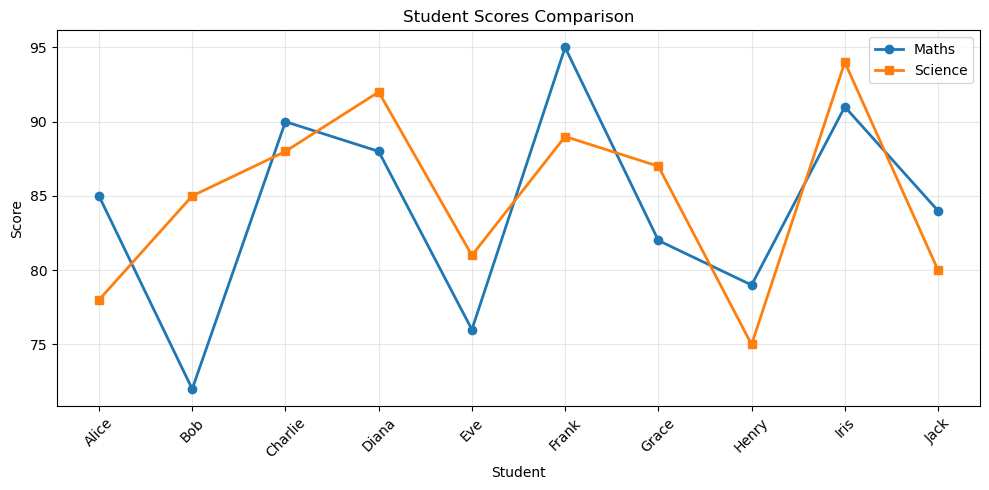

In [29]:
# Line plot - Student scores
plt.figure(figsize=(10, 5))
plt.plot(students_df['name'], students_df['math_score'], 
         marker='o', label='Maths', linewidth=2)
plt.plot(students_df['name'], students_df['science_score'], 
         marker='s', label='Science', linewidth=2)
plt.xlabel('Student')
plt.ylabel('Score')
plt.title('Student Scores Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

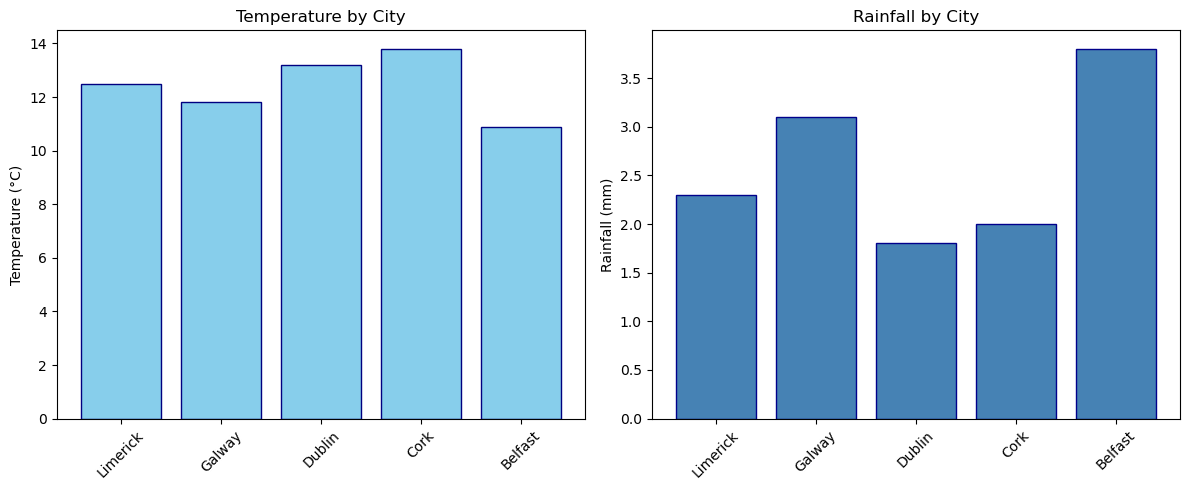

In [30]:
# Bar chart - Weather comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Temperature bar chart
axes[0].bar(weather_merged['city'], weather_merged['temperature'], 
            color='skyblue', edgecolor='navy')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature by City')
axes[0].tick_params(axis='x', rotation=45)

# Rainfall bar chart
axes[1].bar(weather_merged['city'], weather_merged['rainfall_mm'], 
            color='steelblue', edgecolor='darkblue')
axes[1].set_ylabel('Rainfall (mm)')
axes[1].set_title('Rainfall by City')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

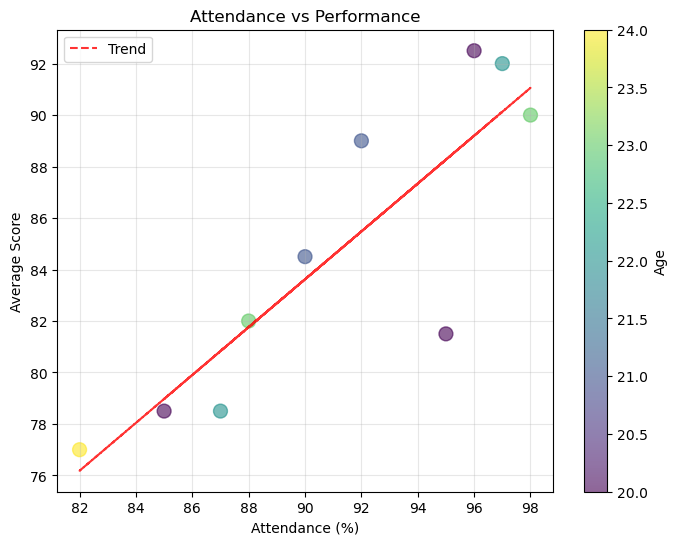

In [31]:
# Scatter plot with trend line
plt.figure(figsize=(8, 6))
plt.scatter(students_df['attendance'], students_df['average_score'], 
            s=100, alpha=0.6, c=students_df['age'], cmap='viridis')
plt.colorbar(label='Age')

# Add trend line
z = np.polyfit(students_df['attendance'], students_df['average_score'], 1)
p = np.poly1d(z)
plt.plot(students_df['attendance'], p(students_df['attendance']), 
         "r--", alpha=0.8, label='Trend')

plt.xlabel('Attendance (%)')
plt.ylabel('Average Score')
plt.title('Attendance vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

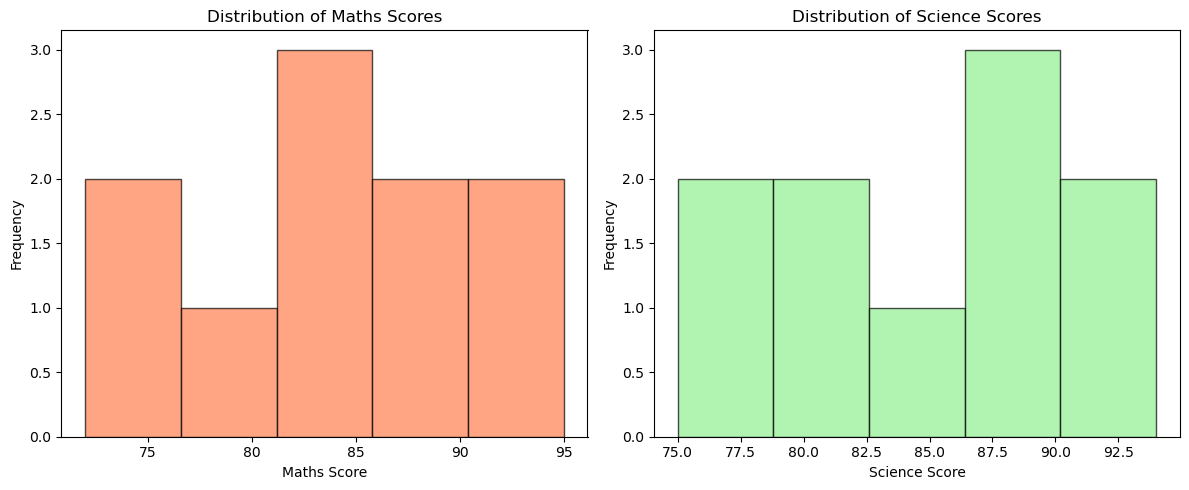

In [32]:
# Histogram - Score distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(students_df['math_score'], bins=5, 
             color='coral', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Maths Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Maths Scores')

axes[1].hist(students_df['science_score'], bins=5, 
             color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Science Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Science Scores')

plt.tight_layout()
plt.show()

### 2.2 Subplots and Multiple Visualisations

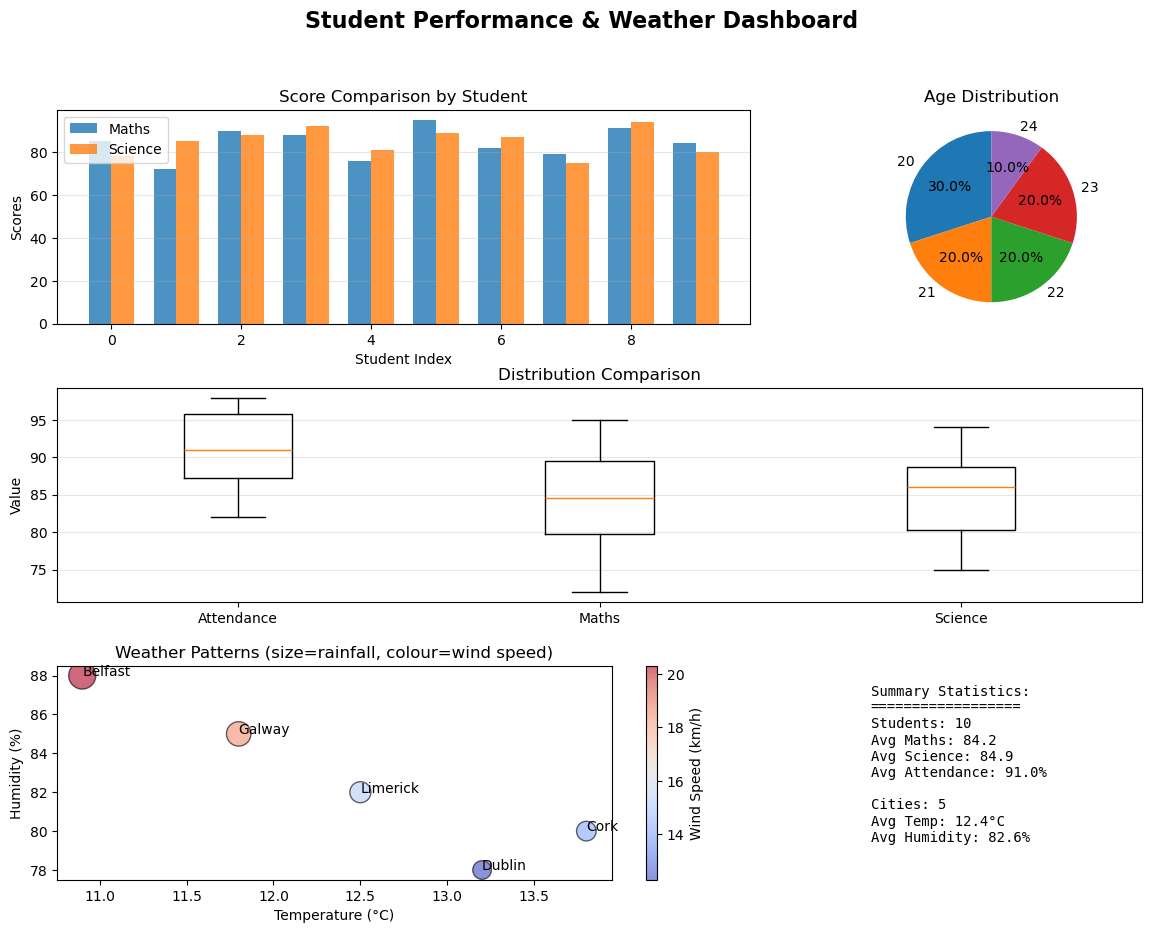

In [33]:
# Create a dashboard-style visualisation
fig = plt.figure(figsize=(14, 10))

# Define grid
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Score comparison (spans 2 columns)
ax1 = fig.add_subplot(gs[0, :2])
x = np.arange(len(students_df))
width = 0.35
ax1.bar(x - width/2, students_df['math_score'], width, label='Maths', alpha=0.8)
ax1.bar(x + width/2, students_df['science_score'], width, label='Science', alpha=0.8)
ax1.set_xlabel('Student Index')
ax1.set_ylabel('Scores')
ax1.set_title('Score Comparison by Student')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Age distribution
ax2 = fig.add_subplot(gs[0, 2])
age_counts = students_df['age'].value_counts().sort_index()
ax2.pie(age_counts.values, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Age Distribution')

# Plot 3: Attendance box plot
ax3 = fig.add_subplot(gs[1, :])
ax3.boxplot([students_df['attendance'], students_df['math_score'], 
             students_df['science_score']], 
            tick_labels=['Attendance', 'Maths', 'Science'])
ax3.set_ylabel('Value')
ax3.set_title('Distribution Comparison')
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Weather scatter
ax4 = fig.add_subplot(gs[2, :2])
scatter = ax4.scatter(weather_merged['temperature'], weather_merged['humidity'], 
                     s=weather_merged['rainfall_mm']*100, 
                     c=weather_merged['wind_speed'], 
                     cmap='coolwarm', alpha=0.6, edgecolors='black')
for i, city in enumerate(weather_merged['city']):
    ax4.annotate(city, (weather_merged['temperature'].iloc[i], 
                        weather_merged['humidity'].iloc[i]))
ax4.set_xlabel('Temperature (°C)')
ax4.set_ylabel('Humidity (%)')
ax4.set_title('Weather Patterns (size=rainfall, colour=wind speed)')
plt.colorbar(scatter, ax=ax4, label='Wind Speed (km/h)')

# Plot 5: Summary statistics
ax5 = fig.add_subplot(gs[2, 2])
ax5.axis('off')
summary_text = f"""Summary Statistics:
==================
Students: {len(students_df)}
Avg Maths: {students_df['math_score'].mean():.1f}
Avg Science: {students_df['science_score'].mean():.1f}
Avg Attendance: {students_df['attendance'].mean():.1f}%

Cities: {len(weather_merged)}
Avg Temp: {weather_merged['temperature'].mean():.1f}°C
Avg Humidity: {weather_merged['humidity'].mean():.1f}%
"""
ax5.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
         verticalalignment='center')

plt.suptitle('Student Performance & Weather Dashboard', fontsize=16, fontweight='bold')
plt.show()

---
## Part 3: Working with Images

Images are simply arrays of numbers! Let's explore how to work with them:

### 3.1 Create Sample Images

In [34]:
from PIL import Image
import cv2

# Create a simple RGB image using numpy
# Red gradient
red_image = np.zeros((200, 200, 3), dtype=np.uint8)
for i in range(200):
    red_image[:, i] = [i, 0, 0]  # RGB format

# Blue gradient
blue_image = np.zeros((200, 200, 3), dtype=np.uint8)
for i in range(200):
    blue_image[i, :] = [0, 0, i]

# Save using PIL
Image.fromarray(red_image).save('red_gradient.png')
Image.fromarray(blue_image).save('blue_gradient.png')

print("Created sample images: red_gradient.png and blue_gradient.png")
print(f"Red image shape: {red_image.shape}")
print(f"Data type: {red_image.dtype}")
print(f"Value range: [{red_image.min()}, {red_image.max()}]")

Created sample images: red_gradient.png and blue_gradient.png
Red image shape: (200, 200, 3)
Data type: uint8
Value range: [0, 199]


### 3.2 Loading and Displaying Images

**Important Note:** PIL and OpenCV handle colours differently!
- **PIL/Matplotlib**: RGB (Red, Green, Blue)
- **OpenCV**: BGR (Blue, Green, Red)

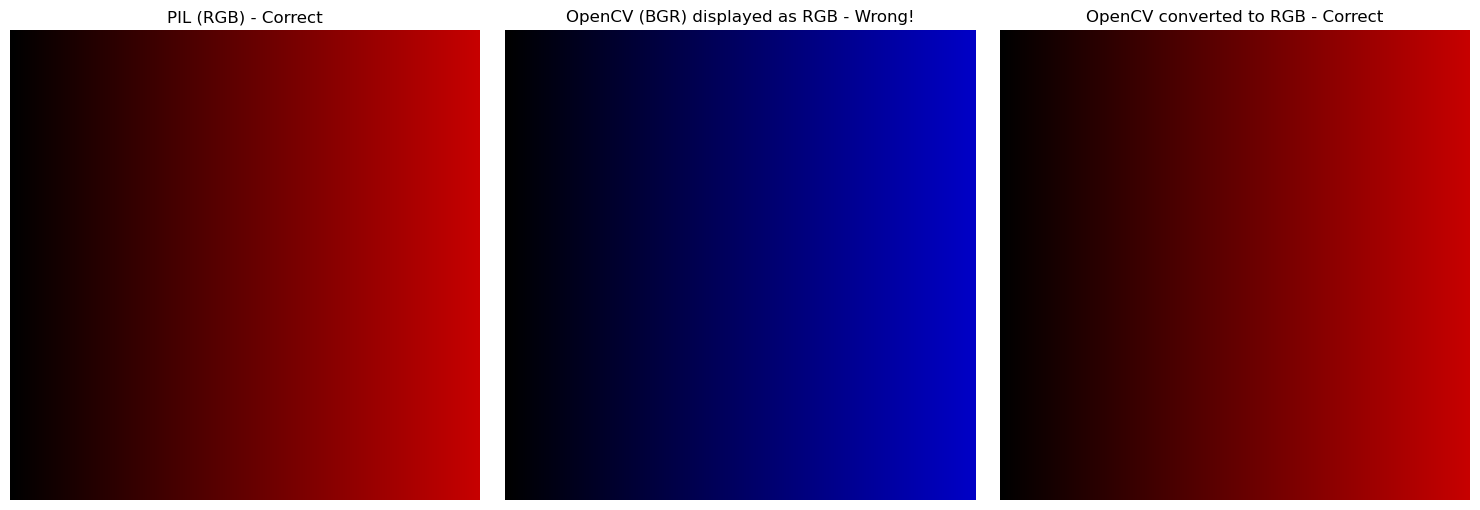

Notice how the middle image looks wrong!
Always convert OpenCV images: cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [35]:
# Load image with PIL
pil_image = Image.open('red_gradient.png')
pil_array = np.array(pil_image)

# Load same image with OpenCV
cv_image = cv2.imread('red_gradient.png')

# Compare
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(pil_array)
axes[0].set_title('PIL (RGB) - Correct')
axes[0].axis('off')

axes[1].imshow(cv_image)
axes[1].set_title('OpenCV (BGR) displayed as RGB - Wrong!')
axes[1].axis('off')

# Convert BGR to RGB for correct display
cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
axes[2].imshow(cv_image_rgb)
axes[2].set_title('OpenCV converted to RGB - Correct')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Notice how the middle image looks wrong!")
print("Always convert OpenCV images: cv2.cvtColor(img, cv2.COLOR_BGR2RGB)")

## Exercise, fix the colour space

Now try with the image 353.jpg

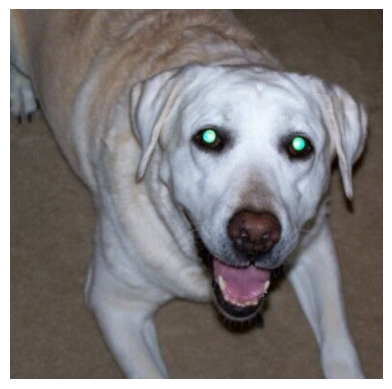

In [36]:
# Load 353.jpg using OpenCV
# Display it correctly using matplotlib
# Your code here:
cv_image_353 = cv2.imread('353.jpg')
cv_image_353 = cv2.cvtColor(cv_image_353, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(cv_image_353)

### 3.3 Image as NumPy Arrays

In [37]:
# Examine image properties
print("Image properties:")
print(f"Shape: {pil_array.shape}")  # (height, width, channels)
print(f"Data type: {pil_array.dtype}")
print(f"Number of pixels: {pil_array.shape[0] * pil_array.shape[1]}")
print(f"Total elements: {pil_array.size}")

# Access individual pixels
print(f"\nTop-left pixel (RGB): {pil_array[0, 0]}")
print(f"Top-right pixel (RGB): {pil_array[0, -1]}")

# Access colour channels
print(f"\nRed channel shape: {pil_array[:, :, 0].shape}")
print(f"Green channel shape: {pil_array[:, :, 1].shape}")
print(f"Blue channel shape: {pil_array[:, :, 2].shape}")

Image properties:
Shape: (200, 200, 3)
Data type: uint8
Number of pixels: 40000
Total elements: 120000

Top-left pixel (RGB): [0 0 0]
Top-right pixel (RGB): [199   0   0]

Red channel shape: (200, 200)
Green channel shape: (200, 200)
Blue channel shape: (200, 200)


In [38]:
pil_array

array([[[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]],

       [[  0,   0,   0],
        [  1,   0,   0],
        [  2,   0,   0],
        ...,
        [197,   0,   0],
        [198,   0,   0],
        [199,   0,   0]]

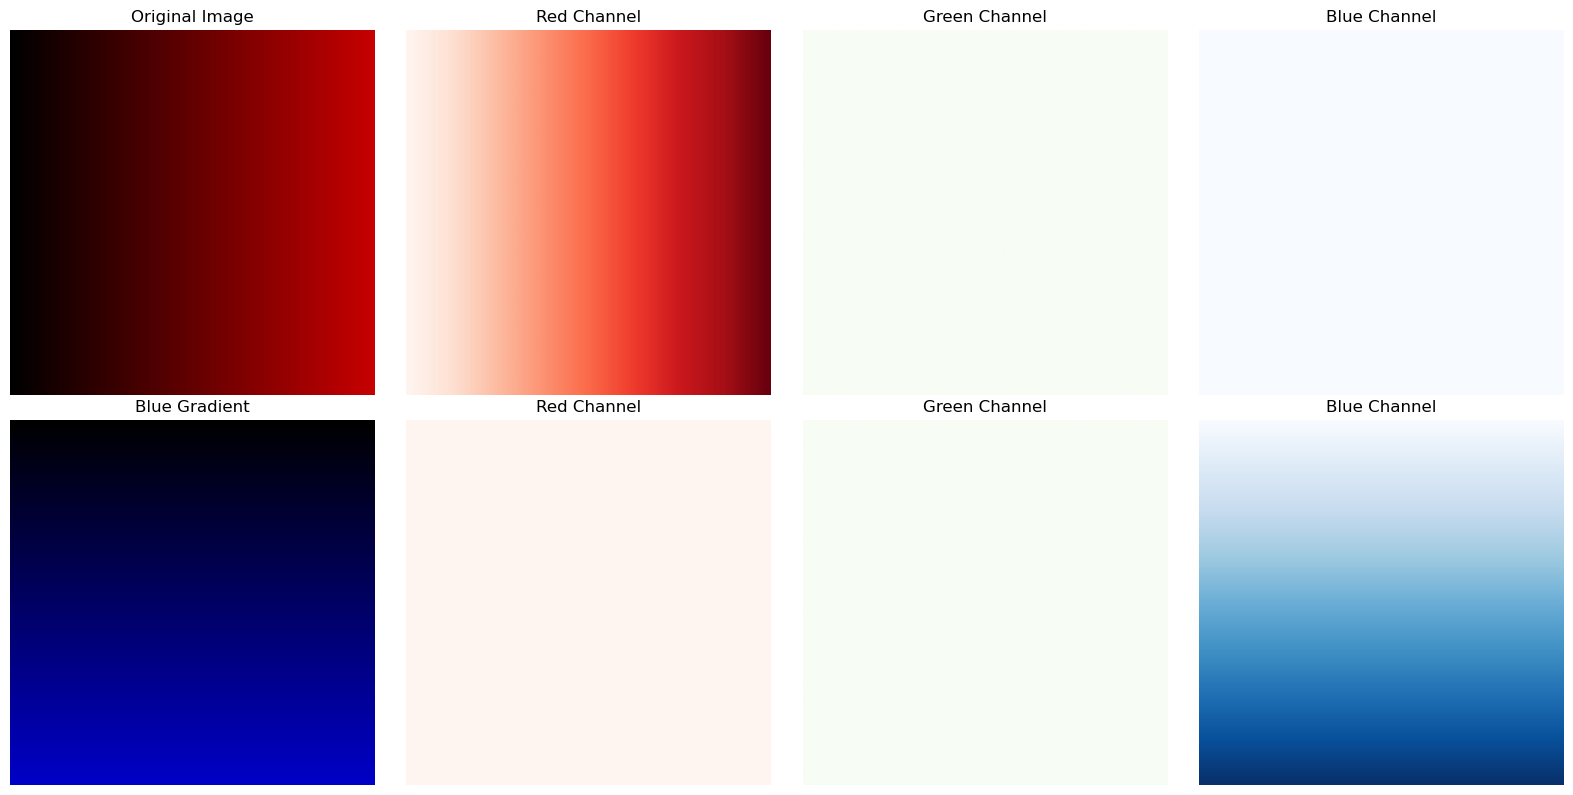

In [39]:
# Visualise individual colour channels
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Original image
axes[0, 0].imshow(pil_array)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Red channel
axes[0, 1].imshow(pil_array[:, :, 0], cmap='Reds')
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

# Green channel
axes[0, 2].imshow(pil_array[:, :, 1], cmap='Greens')
axes[0, 2].set_title('Green Channel')
axes[0, 2].axis('off')

# Blue channel
axes[0, 3].imshow(pil_array[:, :, 2], cmap='Blues')
axes[0, 3].set_title('Blue Channel')
axes[0, 3].axis('off')

# Do the same for blue gradient
blue_array = np.array(Image.open('blue_gradient.png'))

axes[1, 0].imshow(blue_array)
axes[1, 0].set_title('Blue Gradient')
axes[1, 0].axis('off')

axes[1, 1].imshow(blue_array[:, :, 0], cmap='Reds')
axes[1, 1].set_title('Red Channel')
axes[1, 1].axis('off')

axes[1, 2].imshow(blue_array[:, :, 1], cmap='Greens')
axes[1, 2].set_title('Green Channel')
axes[1, 2].axis('off')

axes[1, 3].imshow(blue_array[:, :, 2], cmap='Blues')
axes[1, 3].set_title('Blue Channel')
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

## Exercise Pixel exploration

In [40]:
# 1. Access and print the pixel values at position (100, 100) in red_gradient.png
# 2. What do you expect the RGB values to be? Check if you're right!
# 3. Extract just the red channel and find its maximum value
# Your code here:
red_array = np.array(Image.open('red_gradient.png'))
pixel_100_100 = red_array[100, 100]
print(f"Pixel at (100, 100): {pixel_100_100}")

red_channel = red_array[:, :, 0]
max_red_value = red_channel.max()
print(f"Maximum value in red channel: {max_red_value}")

Pixel at (100, 100): [100   0   0]
Maximum value in red channel: 199


## Exercise Channel Manipulation

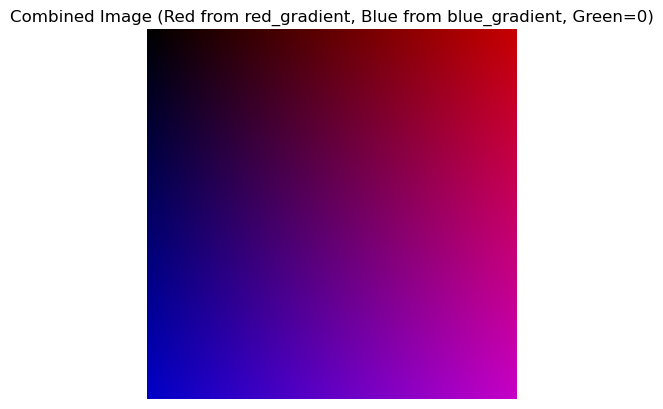

In [41]:
# Create a new image where:
# - Red channel comes from red_gradient.png
# - Blue channel comes from blue_gradient.png
# - Green channel is all zeros
# Display the result - what colour do you expect?
# Your code here:
new_image = np.zeros_like(red_array)
new_image[:, :, 0] = red_array[:, :, 0]  # Red channel
new_image[:, :, 1] = 0  # Green channel
new_image[:, :, 2] = blue_array[:, :, 2]  # Blue channel

plt.imshow(new_image)
plt.axis('off')
plt.title('Combined Image (Red from red_gradient, Blue from blue_gradient, Green=0)')
plt.show()

### 3.4 Normalisation: Converting from [0, 255] to [0, 1]

Most machine learning models expect pixel values in [0, 1] rather than [0, 255]:

Original range:
Min: 0, Max: 199, Dtype: uint8

After dividing by 255:
Min: 0.000, Max: 0.780, Dtype: float64

Using sklearn MinMaxScaler:
Min: 0.000, Max: 1.000


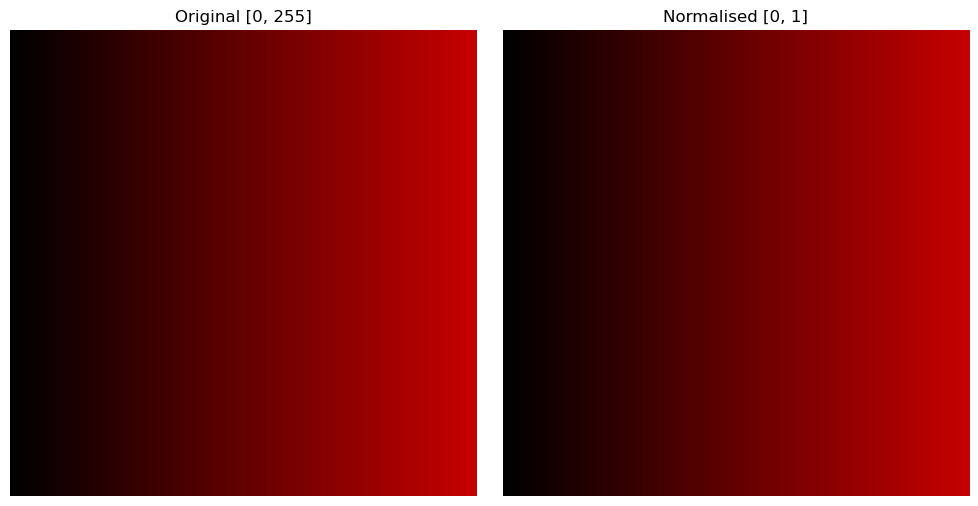


Note: Both images look identical because matplotlib handles both ranges!


In [42]:
# Original image (0-255)
img_255 = np.array(Image.open('red_gradient.png'))
print("Original range:")
print(f"Min: {img_255.min()}, Max: {img_255.max()}, Dtype: {img_255.dtype}")

# Method 1: Simple division
img_01 = img_255 / 255.0
print("\nAfter dividing by 255:")
print(f"Min: {img_01.min():.3f}, Max: {img_01.max():.3f}, Dtype: {img_01.dtype}")

# Method 2: Using sklearn (useful for other normalisations too)
from sklearn.preprocessing import MinMaxScaler

# Reshape for sklearn (it expects 2D)
img_flat = img_255.reshape(-1, 3)
scaler = MinMaxScaler()
img_scaled_flat = scaler.fit_transform(img_flat)
img_scaled = img_scaled_flat.reshape(img_255.shape)

print("\nUsing sklearn MinMaxScaler:")
print(f"Min: {img_scaled.min():.3f}, Max: {img_scaled.max():.3f}")

# Display both
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_255)
axes[0].set_title('Original [0, 255]')
axes[0].axis('off')

axes[1].imshow(img_01)
axes[1].set_title('Normalised [0, 1]')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\nNote: Both images look identical because matplotlib handles both ranges!")

### 3.5 Image Manipulations

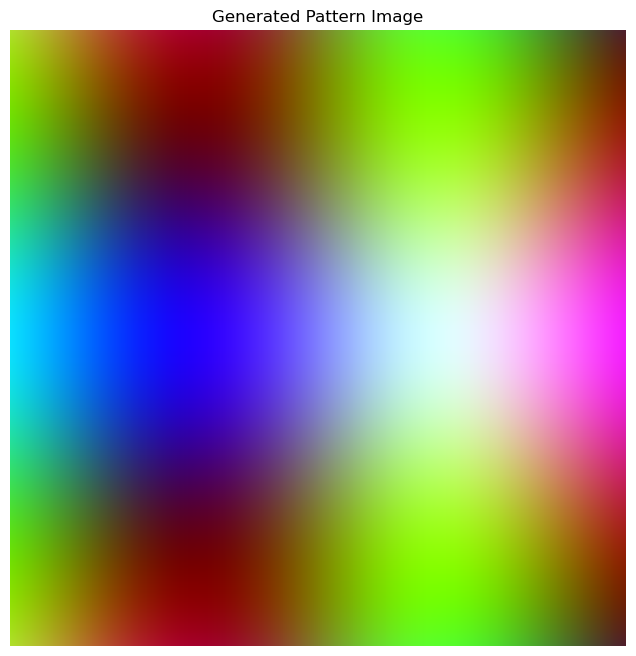

In [43]:
# Create a more interesting image
height, width = 300, 300
x, y = np.meshgrid(np.linspace(-2, 2, width), np.linspace(-2, 2, height))

# Create RGB channels with different patterns
r = (np.sin(x) * np.cos(y) + 1) / 2
g = (np.sin(x * 2) + 1) / 2
b = (np.cos(y * 2) + 1) / 2

pattern_img = np.dstack([r, g, b])
pattern_img = (pattern_img * 255).astype(np.uint8)

# Save it
Image.fromarray(pattern_img).save('pattern.png')

# Display
plt.figure(figsize=(8, 8))
plt.imshow(pattern_img)
plt.title('Generated Pattern Image')
plt.axis('off')
plt.show()

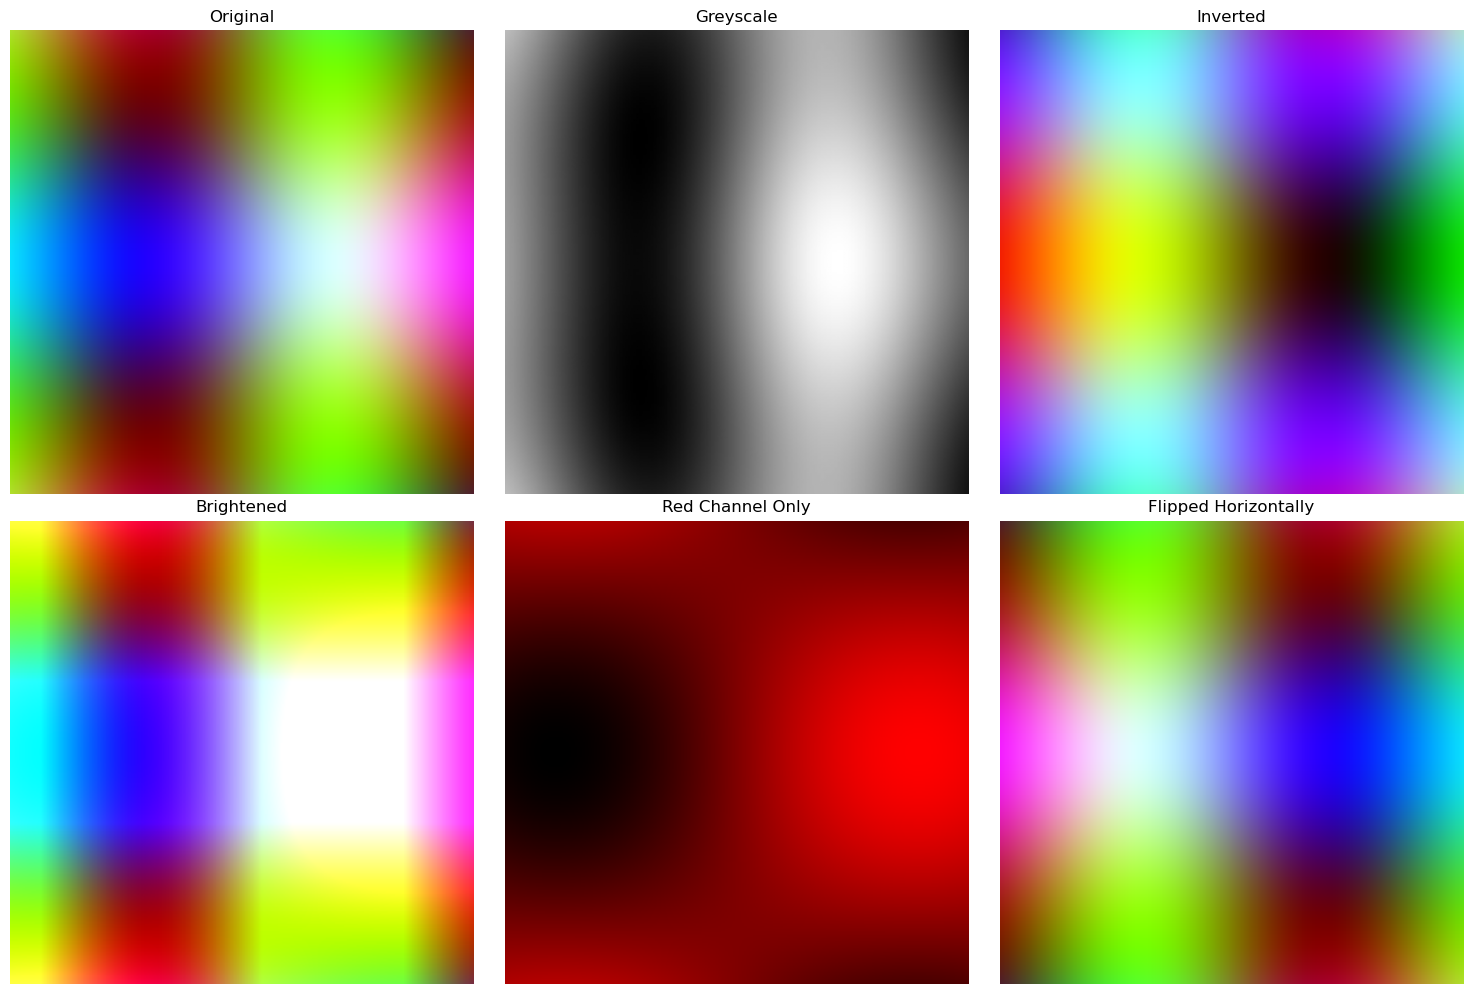

In [44]:
# Various transformations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original
axes[0, 0].imshow(pattern_img)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# Grayscale (using luminosity method)
gray = 0.299 * pattern_img[:, :, 0] + \
       0.587 * pattern_img[:, :, 1] + \
       0.114 * pattern_img[:, :, 2]
axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Greyscale')
axes[0, 1].axis('off')

# Inverted
inverted = 255 - pattern_img
axes[0, 2].imshow(inverted)
axes[0, 2].set_title('Inverted')
axes[0, 2].axis('off')

# Brightened
brightened = np.clip(pattern_img * 1.5, 0, 255).astype(np.uint8)
axes[1, 0].imshow(brightened)
axes[1, 0].set_title('Brightened')
axes[1, 0].axis('off')

# Only red channel
red_only = pattern_img.copy()
red_only[:, :, 1] = 0  # Remove green
red_only[:, :, 2] = 0  # Remove blue
axes[1, 1].imshow(red_only)
axes[1, 1].set_title('Red Channel Only')
axes[1, 1].axis('off')

# Flipped
flipped = np.fliplr(pattern_img)
axes[1, 2].imshow(flipped)
axes[1, 2].set_title('Flipped Horizontally')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## Exercise Create Your Own Transformations

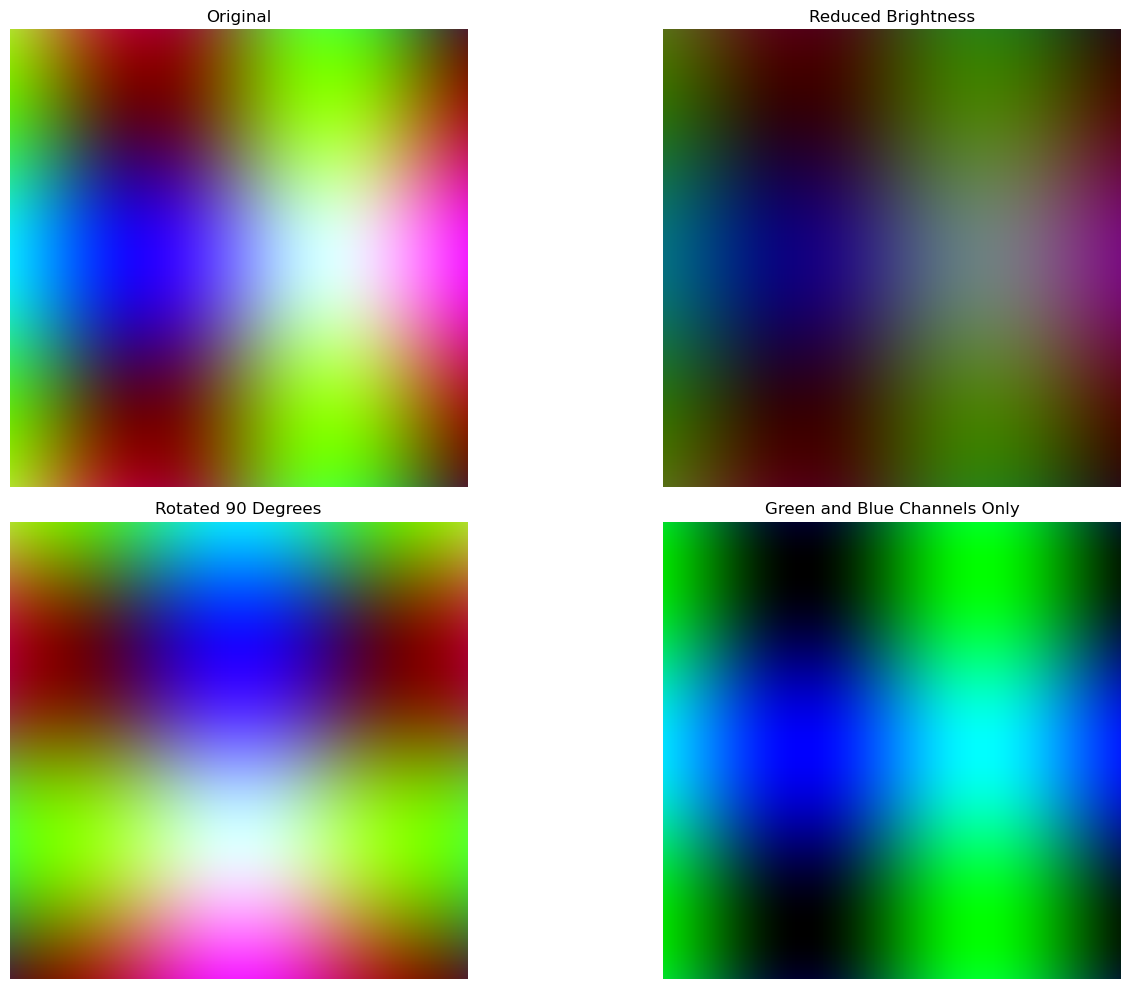

In [45]:
# Using pattern.png, create the following:
# 1. A version that's rotated 90 degrees (hint: use np.rot90)
# 2. A version with reduced brightness (multiply by 0.5)
# 3. A version with only the green and blue channels (remove red)
# 4. Display all three in a subplot
# Your code here:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original
axes[0, 0].imshow(pattern_img)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

# 1. Rotated 90 degrees
rotated_90 = np.rot90(pattern_img, k=-1)
axes[1, 0].imshow(rotated_90)
axes[1, 0].set_title('Rotated 90 Degrees')
axes[1, 0].axis('off')

# 2. Reduced brightness
reduced_brightness = np.clip(pattern_img * 0.5, 0, 255).astype(np.uint8)
axes[0, 1].imshow(reduced_brightness)
axes[0, 1].set_title('Reduced Brightness')
axes[0, 1].axis('off')

# 3. Only green and blue channels
green_blue_only = pattern_img.copy()
green_blue_only[:, :, 0] = 0  # Remove red
axes[1, 1].imshow(green_blue_only)
axes[1, 1].set_title('Green and Blue Channels Only')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## Exercise Create A Filter Challenge

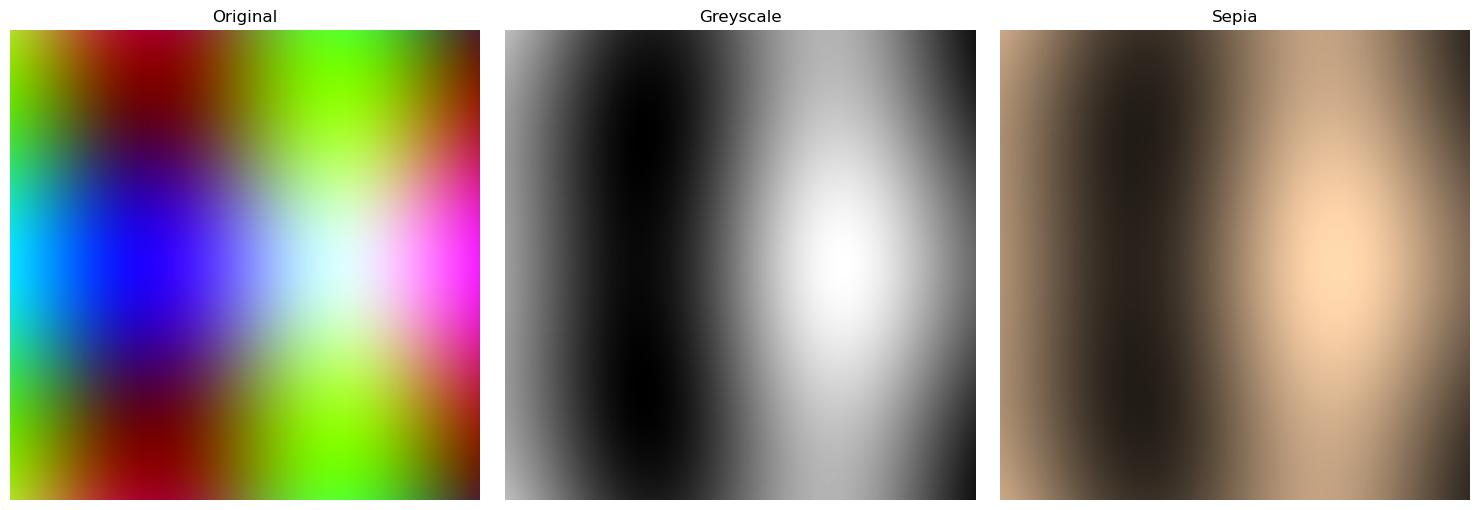

In [46]:
# Create a simple "vintage" filter for pattern.png:
# 1. Convert to grayscale using the luminosity method
# 2. Add a sepia tone by creating an RGB image where:
#    R = gray * 1.2, G = gray * 1.0, B = gray * 0.8
# 3. Reduce the overall brightness by 10%
# 4. Display original, grayscale, and sepia versions
# Your code here:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

gray = 0.299 * pattern_img[:, :, 0] + \
       0.587 * pattern_img[:, :, 1] + \
       0.114 * pattern_img[:, :, 2]

sepia = np.zeros_like(pattern_img)
sepia[:, :, 0] = np.clip(gray * 1.2 * 0.9, 0, 255)  # Red (Boosted + dimmed)
sepia[:, :, 1] = np.clip(gray * 1.0 * 0.9, 0, 255)  # Green (Dimmed)
sepia[:, :, 2] = np.clip(gray * 0.8 * 0.9, 0, 255)  # Blue (Reduced + dimmed)
sepia = sepia.astype(np.uint8)


axes[0].imshow(pattern_img)
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Greyscale')
axes[1].axis('off')

axes[2].imshow(sepia)
axes[2].set_title('Sepia')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Exercise Use the dog image

Using 353.jpg, try the vintage filter and try rotating the image

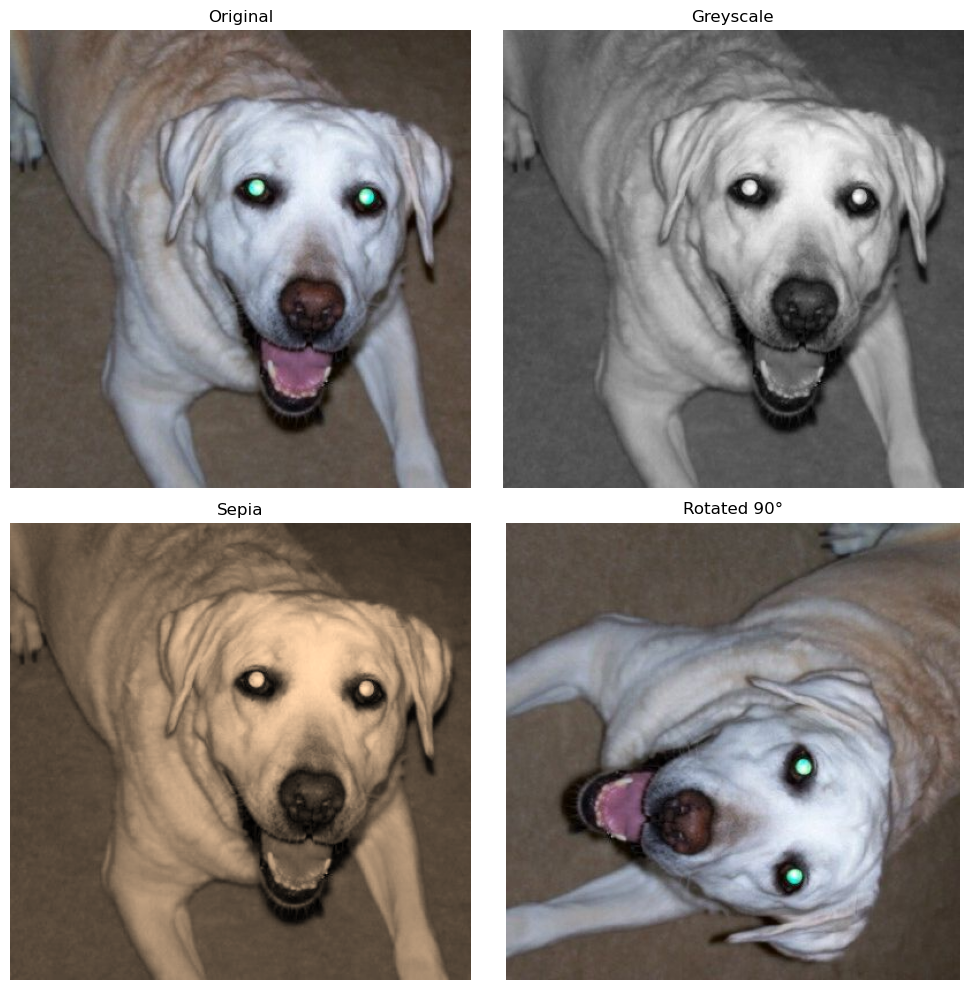

In [47]:
dog_image = cv2.imread('353.jpg')
dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

gray = 0.299 * dog_image[:, :, 0] + \
       0.587 * dog_image[:, :, 1] + \
       0.114 * dog_image[:, :, 2]

sepia = np.zeros_like(dog_image)
sepia[:, :, 0] = np.clip(gray * 1.2 * 0.9, 0, 255)  # Red (Boosted + dimmed)
sepia[:, :, 1] = np.clip(gray * 1.0 * 0.9, 0, 255)  # Green (Dimmed)
sepia[:, :, 2] = np.clip(gray * 0.8 * 0.9, 0, 255)  # Blue (Reduced + dimmed)
sepia = sepia.astype(np.uint8)

dog_image_rotated_90 = np.rot90(dog_image, k=-1)

axes[0, 0].imshow(dog_image)
axes[0, 0].set_title('Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Greyscale')
axes[0, 1].axis('off')

axes[1, 0].imshow(sepia)
axes[1, 0].set_title('Sepia')
axes[1, 0].axis('off')

axes[1, 1].imshow(dog_image_rotated_90)
axes[1, 1].set_title('Rotated 90°')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

---
## Part 4: Introduction to Scikit-learn

Scikit-learn is the primary machine learning library in Python. Let's get familiar with its workflow:

### 4.1 The Scikit-learn Workflow

All scikit-learn models follow the same pattern:
1. **Import** the model class
2. **Instantiate** the model (possibly with hyperparameters)
3. **Fit** the model to training data
4. **Predict** on new data
5. **Evaluate** the model's performance

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [49]:
X = students_df[["age", "math_score"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_scaled)

kmeans.labels_

[[-1.17953565  0.11800488]
 [ 0.29488391 -1.79957446]
 [-0.44232587  0.8555354 ]
 [ 1.03209369  0.56052319]
 [-1.17953565 -1.20955005]
 [ 0.29488391  1.59306591]
 [-0.44232587 -0.32451343]
 [ 1.76930347 -0.76703174]
 [-1.17953565  1.0030415 ]
 [ 1.03209369 -0.02950122]]


array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int32)

In [50]:
# Let's predict science scores from maths scores
X = students_df[['math_score', 'attendance']]  # Features (2D array)
y = students_df['science_score']  # Target (1D array)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Feature matrix shape: (10, 2)
Target vector shape: (10,)

Training samples: 7
Testing samples: 3


In [51]:
# 1. Import (already done above)
# 2. Instantiate
model = LinearRegression()

# 3. Fit
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)

# 5. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

# Show predictions vs actual
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred.round(1),
    'Difference': (y_test.values - y_pred).round(1)
})
print("\nPredictions vs Actual:")
print(comparison)

Model Performance:
Mean Squared Error: 25.70
R² Score: -0.896

Predictions vs Actual:
   Actual  Predicted  Difference
0      94       88.3         5.7
1      85       78.4         6.6
2      89       89.9        -0.9


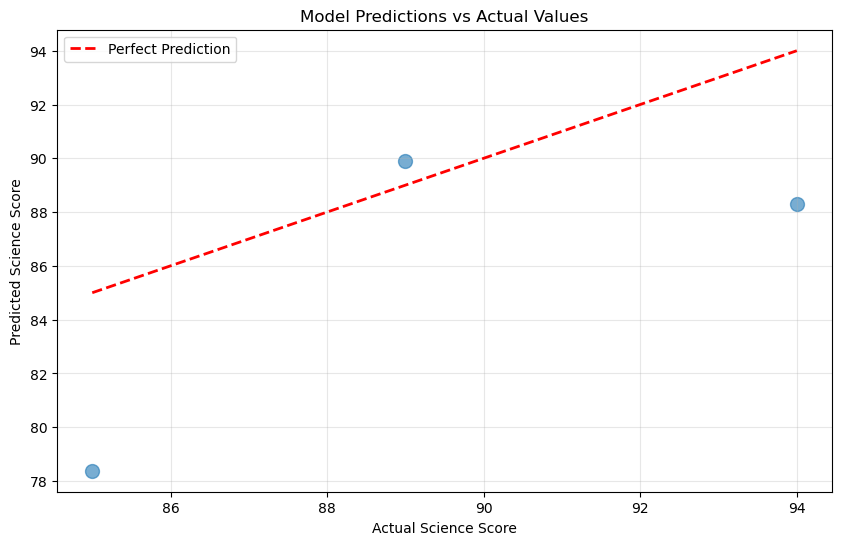


Model Parameters:
Coefficients: [0.25778363 0.55777372]
Intercept: 11.29

Interpretation:
Science Score = 11.3 + 0.26 * Maths + 0.56 * Attendance


In [52]:
# Visualise predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=100)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Science Score')
plt.ylabel('Predicted Science Score')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Model coefficients
print("\nModel Parameters:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"\nInterpretation:")
print(f"Science Score = {model.intercept_:.1f} + " 
      f"{model.coef_[0]:.2f} * Maths + {model.coef_[1]:.2f} * Attendance")

### 4.2 Classification Example

Let's create a simple classification task:

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a binary classification task: High vs Low performer
# High performer: average score > 85
students_df['performance'] = (students_df['average_score'] > 85).astype(int)

print("Class distribution:")
print(students_df['performance'].value_counts())

# Features and target
X_class = students_df[['math_score', 'attendance']]
y_class = students_df['performance']

# Split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)

# Train classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train_c, y_train_c)

# Predict
y_pred_c = clf.predict(X_test_c)

# Evaluate
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"\nAccuracy: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_c, 
                          target_names=['Low Performer', 'High Performer']))

Class distribution:
performance
0    6
1    4
Name: count, dtype: int64

Accuracy: 100.00%

Classification Report:
                precision    recall  f1-score   support

 Low Performer       1.00      1.00      1.00         1
High Performer       1.00      1.00      1.00         2

      accuracy                           1.00         3
     macro avg       1.00      1.00      1.00         3
  weighted avg       1.00      1.00      1.00         3



### 4.3 Working with Image Data in Sklearn

Let's use our images with sklearn:

Reshaped to: (90000, 3)
Each row is one pixel's RGB values


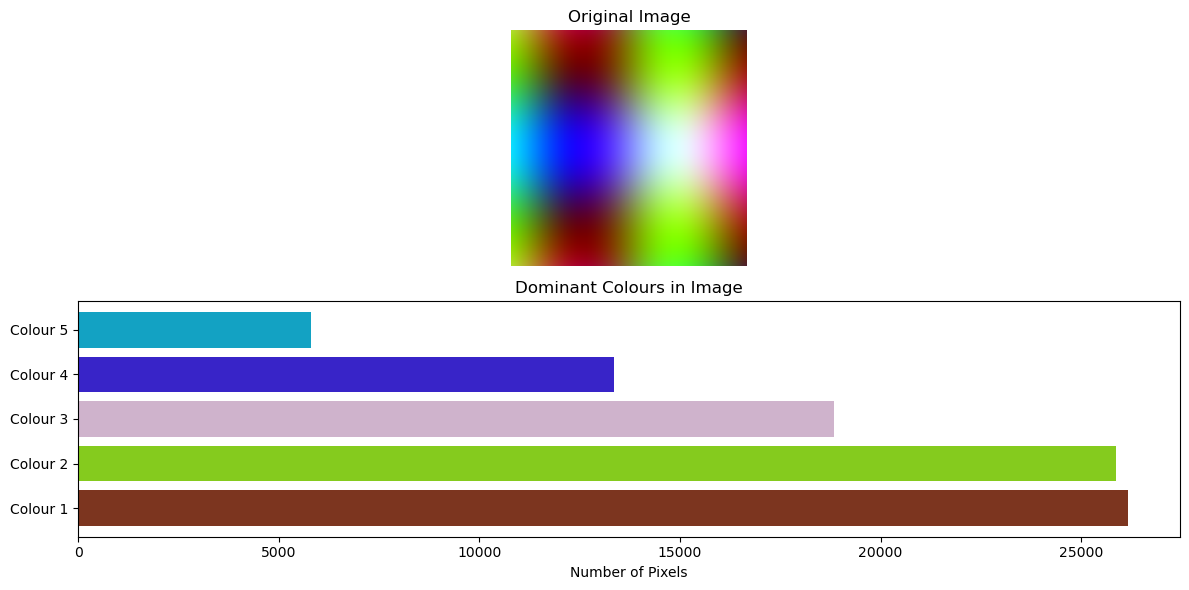


Dominant colours (RGB in [0,1]):
1. RGB: [0.48488653 0.20663334 0.12147024] - 26,156 pixels (29.1%)
2. RGB: [0.52234009 0.79535396 0.11955828] - 25,864 pixels (28.7%)
3. RGB: [0.81009879 0.70330976 0.79924867] - 18,830 pixels (20.9%)
4. RGB: [0.22053699 0.14292494 0.78532216] - 13,352 pixels (14.8%)
5. RGB: [0.07418492 0.63661665 0.76654416] - 5,798 pixels (6.4%)


In [54]:
from sklearn.cluster import KMeans

# Load our pattern image
img = np.array(Image.open('pattern.png'))

# Reshape image to 2D array (pixels x channels)
pixels = img.reshape(-1, 3)
print(f"Reshaped to: {pixels.shape}")
print(f"Each row is one pixel's RGB values")

# Normalise to [0, 1]
pixels_norm = pixels / 255.0

# Use K-Means to find dominant colours
n_colours = 5
kmeans = KMeans(n_clusters=n_colours, random_state=42, n_init=10)
kmeans.fit(pixels_norm)

# Get the dominant colours
colours = kmeans.cluster_centers_
colour_counts = np.bincount(kmeans.labels_)

# Sort by frequency
sorted_indices = np.argsort(colour_counts)[::-1]
colours_sorted = colours[sorted_indices]
counts_sorted = colour_counts[sorted_indices]

# Display dominant colours
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Original image
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Dominant colours
axes[1].barh(range(n_colours), counts_sorted, 
             color=[colours_sorted[i] for i in range(n_colours)])
axes[1].set_yticks(range(n_colours))
axes[1].set_yticklabels([f'Colour {i+1}' for i in range(n_colours)])
axes[1].set_xlabel('Number of Pixels')
axes[1].set_title('Dominant Colours in Image')

plt.tight_layout()
plt.show()

print("\nDominant colours (RGB in [0,1]):")
for i, (colour, count) in enumerate(zip(colours_sorted, counts_sorted)):
    pct = count/pixels.shape[0]*100
    print(f"{i+1}. RGB: {colour} - {count:,} pixels ({pct:.1f}%)")

---
## Part 5: Putting It All Together - Mini Challenge

Now it's your turn! Complete the following challenges to test your understanding:

### Challenge 1: Data Analysis
1. Load the weather.json file
2. Calculate the "comfort index" as: `comfort = temperature * (100 - humidity) / wind_speed`
3. Find which city has the highest comfort index
4. Create a visualisation showing comfort index by city

### Challenge 2: Image Processing
1. Load the pattern.png image
2. Create a version with only blue and green channels (no red)
3. Normalise it to [0, 1]
4. Display the original and modified images side by side

### Challenge 3: Sklearn Practice
1. Using the students data, predict `attendance` from `math_score` and `science_score`
2. Split the data 70/30 train/test
3. Train a model and calculate the R² score
4. Visualise predicted vs actual attendance

**Starter code below:**

City with highest comfort index: Dublin


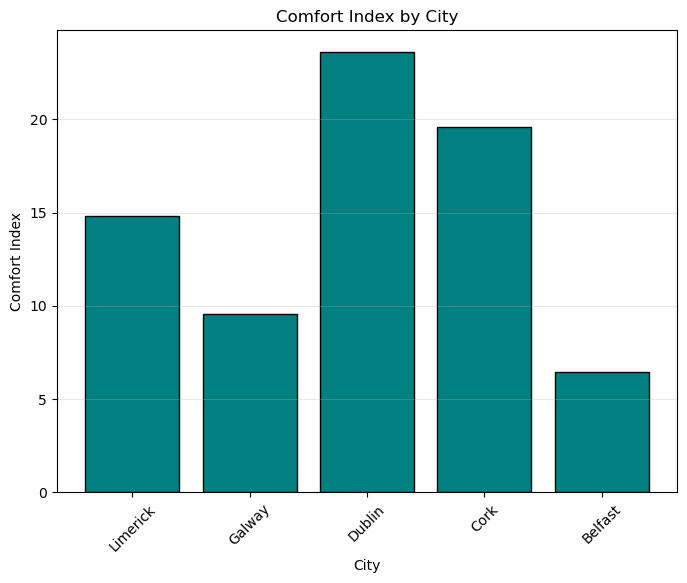

In [55]:
# Challenge 1: Data Analysis
# 1. Load the weather.json file
# 2. Calculate the "comfort index" as: 
# comfort = temperature * (100 - humidity) / wind_speed`
# 3. Find which city has the highest comfort index
# 4. Create a visualisation showing comfort index by city
# Your code here
weather_df = pd.read_json('weather.json')

comfort_index = weather_df['temperature'] * (100 - weather_df['humidity']) / weather_df['wind_speed']
city_max_ci = weather_df.loc[comfort_index.idxmax(), 'city']

print(f"City with highest comfort index: {city_max_ci}")

plt.figure(figsize=(8, 6))
plt.bar(weather_df['city'], comfort_index, color='teal', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Comfort Index')
plt.title('Comfort Index by City')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

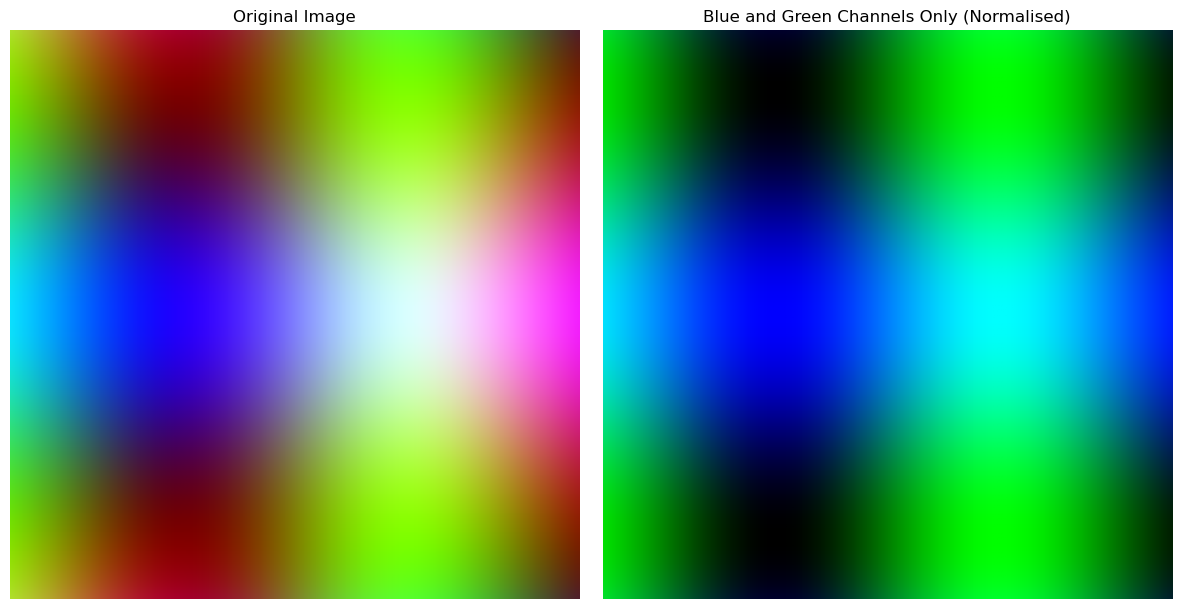

In [56]:
# Challenge 2: Image Processing  
# 1. Load the pattern.png image
# 2. Create a version with only blue and green channels (no red)
# 3. Normalise it to [0, 1]
# 4. Display the original and modified images side by side

# Your code here
pattern_img = np.array(Image.open('pattern.png'))
blue_green_img = pattern_img.copy()
blue_green_img[:, :, 0] = 0  # Remove red channel
blue_green_img_norm = blue_green_img / 255.0

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pattern_img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(blue_green_img_norm)
plt.title('Blue and Green Channels Only (Normalised)')
plt.axis('off')
plt.tight_layout()
plt.show()


R² score for attendance prediction: 0.50


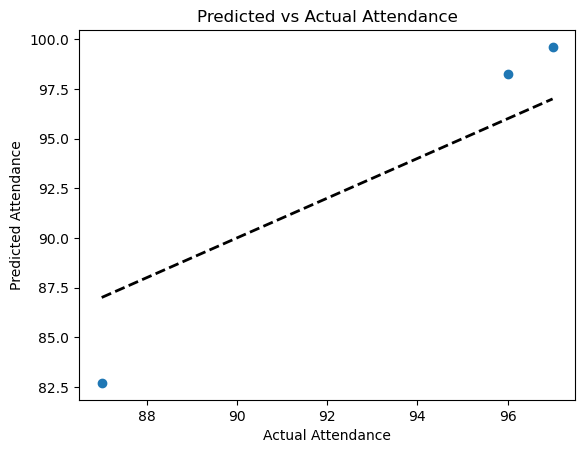

In [57]:
# Challenge 3: Sklearn Practice

# 1. Using the students data, predict `attendance` from 
# `math_score` and `science_score`
# 2. Split the data 70/30 train/test
# 3. Train a model and calculate the R² score
# 4. Visualise predicted vs actual attendance

# Your code here
student_data = pd.read_csv('students.csv')
X_attend = student_data[['math_score', 'science_score']]
y_attend = student_data['attendance']

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_attend, y_attend, test_size=0.3, random_state=42
)

model_attend = LinearRegression()
model_attend.fit(X_train_a, y_train_a)
y_pred_a = model_attend.predict(X_test_a)

r2_score_a = r2_score(y_test_a, y_pred_a)
print(f"R² score for attendance prediction: {r2_score_a:.2f}")

plt.scatter(y_test_a, y_pred_a)
plt.xlabel("Actual Attendance")
plt.ylabel("Predicted Attendance")
plt.title("Predicted vs Actual Attendance")
plt.plot([y_test_a.min(), y_test_a.max()], [y_test_a.min(), y_test_a.max()], 'k--', lw=2)
plt.show()

---
## Summary and Key Takeaways

### Pandas
- `pd.read_csv()` and `pd.read_json()` for loading data
- `df.head()`, `df.describe()`, `df.info()` for exploration
- `df.fillna()` and `df.dropna()` for handling missing data
- `df.groupby()` for aggregations
- `pd.merge()` for combining dataframes

### Matplotlib
- `plt.plot()` for line plots
- `plt.bar()` for bar charts
- `plt.scatter()` for scatter plots
- `plt.hist()` for histograms
- `plt.imshow()` for images
- Always use `plt.tight_layout()` for better spacing

### Images
- Images are numpy arrays with shape (height, width, channels)
- PIL uses RGB, OpenCV uses BGR
- Normalise from [0, 255] to [0, 1] by dividing by 255
- Use `cv2.cvtColor()` to convert colour spaces

### Scikit-learn
- All models follow: import → instantiate → fit → predict → evaluate
- `train_test_split()` to split data
- Different metrics for regression (MSE, R²) vs classification (accuracy, F1)
- Models have `.fit()`, `.predict()`, and `.score()` methods

---
## Next Steps

In the next lab, we'll start building actual machine learning models for regression tasks!

**Resources:**
- Pandas documentation: https://pandas.pydata.org/docs/
- Matplotlib gallery: https://matplotlib.org/stable/gallery/
- Scikit-learn tutorials: https://scikit-learn.org/stable/tutorial/
- OpenCV tutorials: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

**Optional Practice:**
1. Try loading your own CSV files
2. Create more complex visualisations
3. Experiment with different sklearn models (see documentation)
4. Process your own images

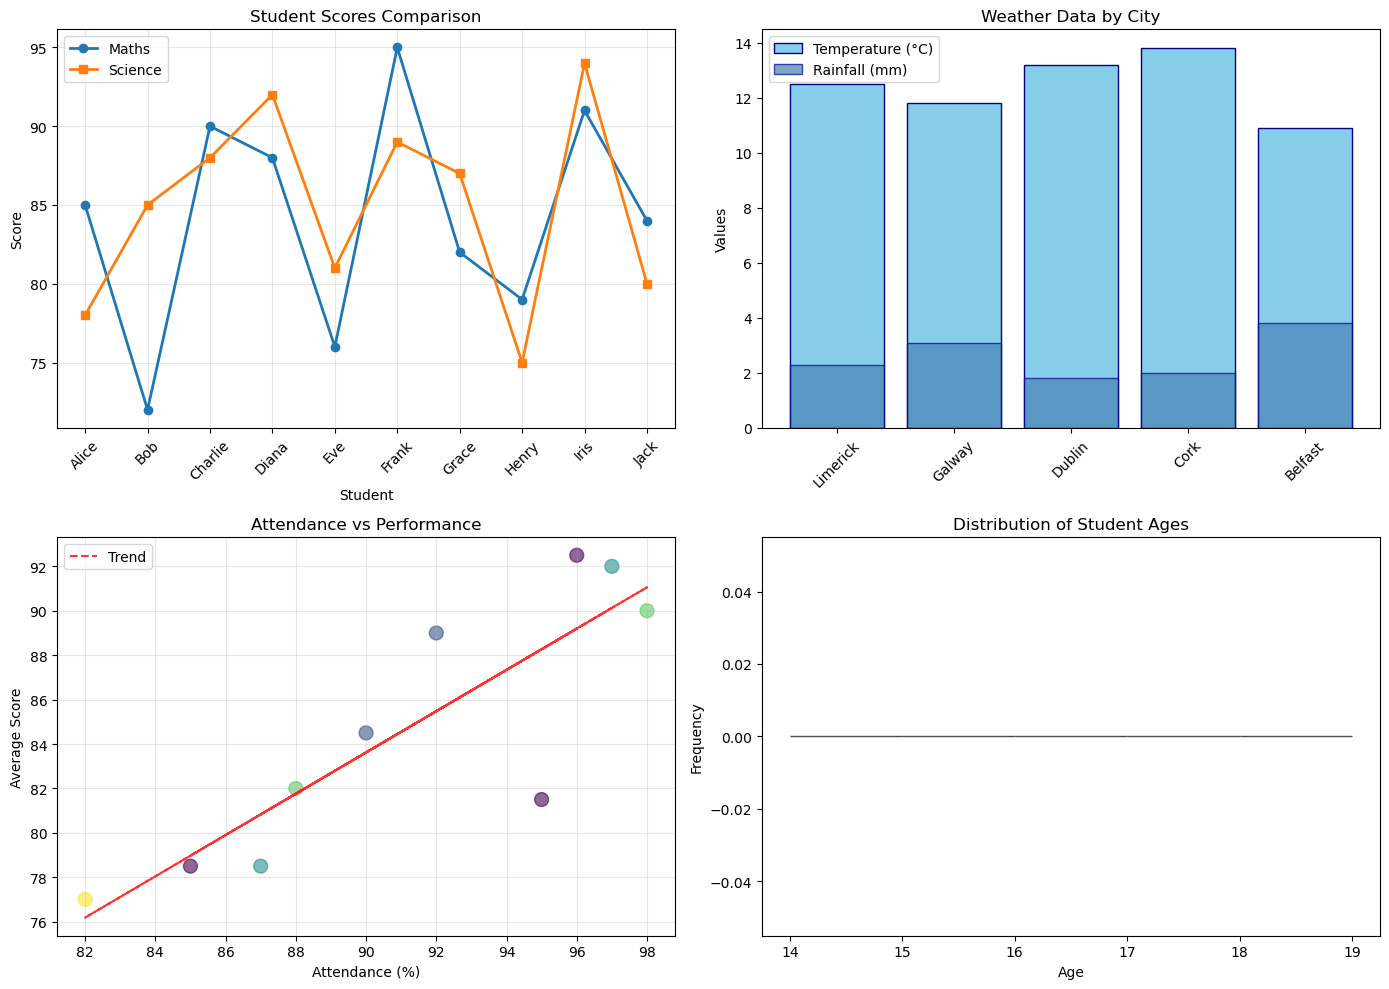

In [58]:
# Complex visualisation challenge
# 1. Create a 2x2 subplot figure
# 2. Top-left: Line plot of student math and science scores
# 3. Top-right: Bar chart of weather temperature and rainfall by city
# 4. Bottom-left: Scatter plot of attendance vs average score with trend line
# 5. Bottom-right: Histogram of student ages
# 6. Add titles, labels, legends as appropriate
# Your code here
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Top-left: Line plot of student scores
axes[0, 0].plot(students_df['name'], students_df['math_score'], 
                 marker='o', label='Maths', linewidth=2)
axes[0, 0].plot(students_df['name'], students_df['science_score'], 
                 marker='s', label='Science', linewidth=2)
axes[0, 0].set_xlabel('Student')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Student Scores Comparison')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)
# Top-right: Bar chart of weather data
axes[0, 1].bar(weather_merged['city'], weather_merged['temperature'], 
                color='skyblue', edgecolor='navy', label='Temperature (°C)')
axes[0, 1].bar(weather_merged['city'], weather_merged['rainfall_mm'], 
                color='steelblue', edgecolor='darkblue', label='Rainfall (mm)', alpha=0.7)
axes[0, 1].set_ylabel('Values')
axes[0, 1].set_title('Weather Data by City')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()
# Bottom-left: Scatter plot of attendance vs average score
axes[1, 0].scatter(students_df['attendance'], students_df['average_score'], 
                   s=100, alpha=0.6, c=students_df['age'], cmap='viridis')
z = np.polyfit(students_df['attendance'], students_df['average_score'], 1)
p = np.poly1d(z)
axes[1, 0].plot(students_df['attendance'], p(students_df['attendance']), 
                 "r--", alpha=0.8, label='Trend')
axes[1, 0].set_xlabel('Attendance (%)')
axes[1, 0].set_ylabel('Average Score')
axes[1, 0].set_title('Attendance vs Performance')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
# Bottom-right: Histogram of student ages
axes[1, 1].hist(students_df['age'], bins=range(14, 20), 
                 color='purple', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Student Ages')
plt.tight_layout()
plt.show()